In [ ]:
import ee
import geemap
import matplotlib.pyplot as plt  # For plotting histograms
import numpy as np
ee.Authenticate()
ee.Initialize(project= 'jose-assignment-2')


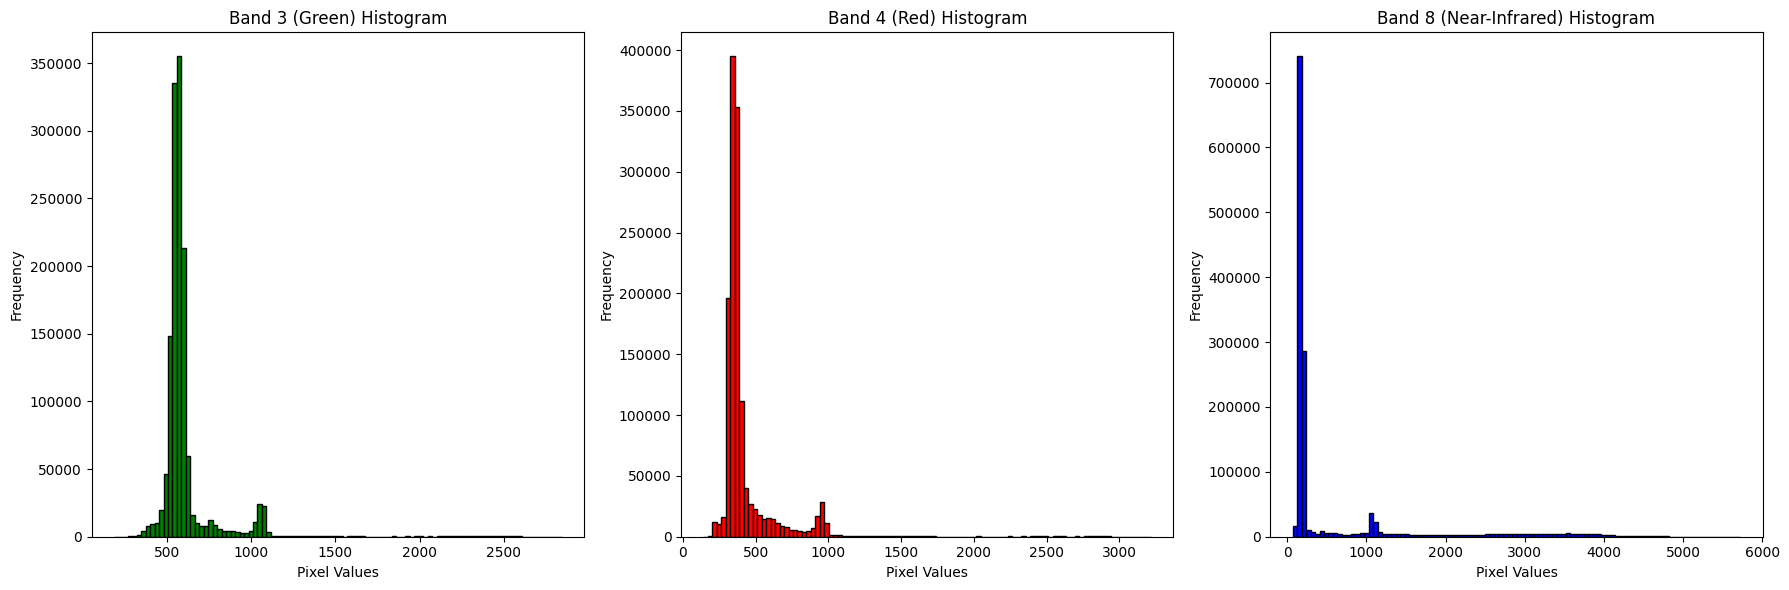

In [ ]:
# Define the area of interest (AOI)
aoi = ee.Geometry.Rectangle([5.34, 52.46, 5.42, 52.60])

# Define the good composite with strict cloud filter
good_composite = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(aoi)

# Select the individual bands (3, 4, 8)
bands = good_composite.select(['B3', 'B4', 'B8'])

# Reduce the region to get the pixel values for each band (we use 'mean' to avoid too large datasets)
# Here, we sample each band and then convert to arrays
reducer = ee.Reducer.toList()

# Create a function to sample the band values and return a list of values
def get_band_values(image, band_name, region, scale=10):
    band = image.select(band_name)
    values = band.reduceRegion(
        reducer=reducer,
        geometry=region,
        scale=scale,
        maxPixels=2e6
    ).get(band_name)
    return ee.Array(values).getInfo()

# Get the pixel values for each band
band3_values = get_band_values(bands, 'B3', aoi)
band4_values = get_band_values(bands, 'B4', aoi)
band8_values = get_band_values(bands, 'B8', aoi)

# Plot histograms for each band
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for Band 3
axs[0].hist(band3_values, bins=100, color='green', edgecolor='black')
axs[0].set_title('Band 3 (Green) Histogram')
axs[0].set_xlabel('Pixel Values')
axs[0].set_ylabel('Frequency')
axs[0].set_ylim()

# Histogram for Band 4
axs[1].hist(band4_values, bins=100, color='red', edgecolor='black')
axs[1].set_title('Band 4 (Red) Histogram')
axs[1].set_xlabel('Pixel Values')
axs[1].set_ylabel('Frequency')

# Histogram for Band 8
axs[2].hist(band8_values, bins=100, color='blue', edgecolor='black')
axs[2].set_title('Band 8 (Near-Infrared) Histogram')
axs[2].set_xlabel('Pixel Values')
axs[2].set_ylabel('Frequency')

# Display the histograms
plt.tight_layout()
plt.show()

In [ ]:
# Define the area of interest (AOI)
aoi = ee.Geometry.Rectangle([5.34, 52.56, 5.42, 52.62])

# Define the good composite with strict cloud filter
good_composite = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(aoi)

# Select one band (Band 4 - Red) for filtering
band = good_composite.select('B4')

# Define Gaussian filter kernel
gaussian_kernel = ee.Kernel.gaussian(
    radius=2,  # radius in pixels
    sigma=1,   # standard deviation
    units='pixels',
    normalize=True
)

# Define Laplacian filter kernel
laplacian_kernel = ee.Kernel.laplacian8()

# Apply Gaussian filter
gaussian_filtered = band.convolve(gaussian_kernel)

# Apply Laplacian filter
laplacian_filtered = band.convolve(laplacian_kernel)

# Create map for visualization
m = geemap.Map()
m.set_center(5.38, 52.59, 12)

# Add original Band 4 to map
m.add_layer(band, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Original Band 4')

# Add Gaussian filtered band to map
m.add_layer(gaussian_filtered, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Gaussian Filtered')

# Add Laplacian filtered band to map
m.add_layer(laplacian_filtered, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Laplacian Filtered')

# Display map
m


Map(center=[52.59, 5.38], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI…

In [ ]:
import geemap
import ee
import matplotlib.pyplot as plt

# Initialize the Earth Engine module.
ee.Initialize()

# Define the area of interest (AOI)
aoi = ee.Geometry.Rectangle([4.36, 52.02, 4.40, 51.98])

# Define the good composite with strict cloud filter
good_composite = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(aoi)

# Select one band (Band 4 - Red) for filtering
band = good_composite.select('B4')

# Define Gaussian filters with different standard deviations (σ)
gaussian_small = ee.Kernel.gaussian(
    radius=2,    # radius in pixels
    sigma=0.5,   # small standard deviation
    units='pixels',
    normalize=True
)

gaussian_moderate = ee.Kernel.gaussian(
    radius=2,    # radius in pixels
    sigma=2,     # moderate standard deviation
    units='pixels',
    normalize=True
)

gaussian_large = ee.Kernel.gaussian(
    radius=2,    # radius in pixels
    sigma=5,     # large standard deviation
    units='pixels',
    normalize=True
)

# Apply the Gaussian filters
filtered_small = band.convolve(gaussian_small)
filtered_moderate = band.convolve(gaussian_moderate)
filtered_large = band.convolve(gaussian_large)

# Create map for visualization
m = geemap.Map()
m.set_center(4.38, 52, 13)

# Add the original band to the map
m.add_layer(band, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Original Band 4')

# Add filtered images to the map
m.add_layer(filtered_small, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Gaussian (σ = 0.5)')
m.add_layer(filtered_moderate, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Gaussian (σ = 2)')
m.add_layer(filtered_large, {'min': 0, 'max': 3000, 'gamma': 1.1}, 'Gaussian (σ = 5)')

# Display the map
m


EEException: ee.Initialize: no project found. Call with project= or see http://goo.gle/ee-auth.

In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define a smaller area of interest (AOI) for efficient computation
smaller_aoi = ee.Geometry.Rectangle([4.365, 52.005, 4.375, 51.995])

# Define the image collection (Sentinel-2) with cloud filtering and clip to the AOI
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(smaller_aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(smaller_aoi)

# Select the specific bands: B02 (Blue), B03 (Green), B04 (Red), B08 (NIR), B11 (SWIR1), B12 (SWIR2)
bands = collection.select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])

# Stack the selected bands into a multi-band image
stacked_image = bands

# Sample the image to collect data points for clustering (5000 pixels)
training_data = stacked_image.sample(region=smaller_aoi, scale=10, numPixels=5000)

# Number of clusters
num_clusters = 5

# Number of iterations
max_iterations = 10

# Apply K-Means Clustering with 5 clusters and 10 iterations
kmeans_clusterer_10 = ee.Clusterer.wekaKMeans(nClusters = num_clusters,
                                    maxIterations = max_iterations).train(training_data)

# Cluster the image
result_10_iterations = stacked_image.cluster(kmeans_clusterer_10)

# Visualize the clustering result
m = geemap.Map()
m.set_center(4.37, 52.00, 14)
m.add_layer(result_10_iterations.randomVisualizer(), {}, 'K-Means Clustering (10 Iterations)')
m


In [ ]:
# Number of clusters
num_clusters = 5

# Number of iterations
max_iterations = 50

# Apply K-Means Clustering with 5 clusters and 50 iterations
kmeans_clusterer_50 = ee.Clusterer.wekaKMeans(nClusters = num_clusters,
                                    maxIterations = max_iterations).train(training_data)

# Cluster the image
result_50_iterations = stacked_image.cluster(kmeans_clusterer_50)

# Visualize the clustering result
m = geemap.Map()
m.set_center(4.37, 52.00, 14)
m.add_layer(result_50_iterations.randomVisualizer(), {}, 'K-Means Clustering (50 Iterations)')
m


In [ ]:
#TASK 5

# Select only the visible bands: B02 (Blue), B03 (Green), B04 (Red)
visible_bands = collection.select(['B2', 'B3', 'B4'])

# Sample the image to collect data points for clustering (5000 pixels)
training_data_visible = visible_bands.sample(region=smaller_aoi, scale=10, numPixels=5000)

# Number of clusters
num_clusters = 5

# Number of iterations
max_iterations = 50

# Apply K-Means Clustering with 5 clusters and 50 iterations
kmeans_clusterer_visible = ee.Clusterer.wekaKMeans(nClusters = num_clusters,
                                    maxIterations = max_iterations).train(training_data)

# Cluster the image
result_visible = visible_bands.cluster(kmeans_clusterer_visible)

# Visualize the clustering result
m = geemap.Map()
m.set_center(4.37, 52.00, 14)
m.add_layer(result_visible.randomVisualizer(), {}, 'K-Means Clustering (Visible Bands, 50 Iterations)')
m


In [ ]:
import ee
import geemap
from google.colab import drive
#drive.mount('/content/drive')

# Define the area of interest (AOI)
aoi = ee.Geometry.Rectangle([4.36, 52.02, 4.40, 51.98])

# Define the Sentinel-2 image collection (with the same bands as in Task 4)
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(smaller_aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(smaller_aoi)

# Select the same bands (B02, B03, B04, B08, B11, B12)
bands = collection.select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])

# Import your uploaded FeatureCollection from Google Earth Engine Assets
# Replace 'yourusername' and 'your_asset_name' with your actual path
drive.mount('/content/drive')
training_samples = ee.FeatureCollection("/content/drive/My Drive/ColabNotebook/Sample_points_task6.shp")

# Sample the image using the training regions
training = bands.sampleRegions(collection=training_samples, properties=['class'], scale=10)

# Train a classifier using the Minimum Distance algorithm
min_dist_classifier = ee.Classifier.minimumDistance().train(training, 'class', bands.bandNames())

# Classify the image
classified_image = bands.classify(min_dist_classifier)

# Visualize the classification result
# Define a color palette for the 5 classes (you can customize this)
palette = ['blue', 'green', 'gray', 'brown', 'lightgray']  # Customize for water, vegetation, etc.

# Create the map
m = geemap.Map()
m.set_center(4.37, 52.00, 14)
# Add the classified image layer with a color palette
m.add_layer(classified_image, {'min': 0, 'max': 4, 'palette': palette}, 'Minimum Distance Classification')

# Display the map
m

#drive.mount('/content/drive')

# # Initialize Earth Engine
# ee.Initialize()

# # Define a smaller AOI for efficient computation
# smaller_aoi = ee.Geometry.Rectangle([4.365, 52.005, 4.375, 51.995])

# # Define the Sentinel-2 image collection (with the same bands as in Task 4)
# collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
#     .filterBounds(smaller_aoi) \
#     .filterDate('2023-06-01', '2024-01-30') \
#     .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
#     .median() \
#     .clip(smaller_aoi)

# # Select the same bands (B02, B03, B04, B08, B11, B12)
# bands = collection.select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])

# # Define ROIs (Regions of Interest) for training samples
# # Each region represents a specific land cover type (water, vegetation, urban, etc.)
# water_roi = ee.Geometry.Polygon([[
#     [4.366, 52.002],
#     [4.368, 52.002],
#     [4.368, 52.004],
#     [4.366, 52.004]
# ]])

# vegetation_roi = ee.Geometry.Polygon([[
#     [4.369, 52.003],
#     [4.371, 52.003],
#     [4.371, 52.005],
#     [4.369, 52.005]
# ]])

# urban_roi = ee.Geometry.Polygon([[
#     [4.373, 52.001],
#     [4.375, 52.001],
#     [4.375, 52.003],
#     [4.373, 52.003]
# ]])

# # Create a FeatureCollection of training samples (class values: 0 = water, 1 = vegetation, 2 = urban)
# training_samples = ee.FeatureCollection([
#     ee.Feature(water_roi, {'class': 0}),
#     ee.Feature(vegetation_roi, {'class': 1}),
#     ee.Feature(urban_roi, {'class': 2}),
# ])

# # Sample the image using the training regions
# training = bands.sampleRegions(collection=training_samples, properties=['class'], scale=10)

# # Train a classifier using the Minimum Distance algorithm
# min_dist_classifier = ee.Classifier.minimumDistance().train(training, 'class', bands.bandNames())

# # Classify the image
# classified_image = bands.classify(min_dist_classifier)

# # Visualize the classification result
# m = geemap.Map()
# m.set_center(4.37, 52.00, 14)
# m.add_layer(classified_image, {}, 'Minimum Distance Classification')
# m


In [ ]:
import ee
import geemap

# Initialize Earth Engine
ee.Initialize()

# Define a smaller AOI for efficient computation
smaller_aoi = ee.Geometry.Rectangle([4.365, 52.005, 4.375, 51.995])

# Define the Sentinel-2 image collection (with the same bands as in Task 6)
collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
    .filterBounds(smaller_aoi) \
    .filterDate('2023-06-01', '2024-01-30') \
    .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
    .median() \
    .clip(smaller_aoi)

# Select the same bands (B02, B03, B04, B08, B11, B12)
bands = collection.select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])

# Define ROIs (Regions of Interest) for 5 land cover classes
# 0 = water, 1 = vegetation, 2 = buildings, 3 = bare lands, 4 = concrete

# Water ROI
water_roi = ee.Geometry.Polygon([[
    [4.366, 52.002],
    [4.368, 52.002],
    [4.368, 52.004],
    [4.366, 52.004]
]])

# Vegetation ROI
vegetation_roi = ee.Geometry.Polygon([[
    [4.369, 52.003],
    [4.371, 52.003],
    [4.371, 52.005],
    [4.369, 52.005]
]])

# Buildings (urban) ROI
urban_roi = ee.Geometry.Polygon([[
    [4.373, 52.001],
    [4.375, 52.001],
    [4.375, 52.003],
    [4.373, 52.003]
]])

# Bare lands ROI
bare_lands_roi = ee.Geometry.Polygon([[
    [4.370, 51.998],
    [4.372, 51.998],
    [4.372, 52.000],
    [4.370, 52.000]
]])

# Concrete ROI (e.g., roads or parking lots)
concrete_roi = ee.Geometry.Polygon([[
    [4.367, 52.000],
    [4.369, 52.000],
    [4.369, 52.002],
    [4.367, 52.002]
]])

# Create a FeatureCollection of training samples for the 5 classes
training_samples = ee.FeatureCollection([
    ee.Feature(water_roi, {'class': 0}),
    ee.Feature(vegetation_roi, {'class': 1}),
    ee.Feature(urban_roi, {'class': 2}),
    ee.Feature(bare_lands_roi, {'class': 3}),
    ee.Feature(concrete_roi, {'class': 4}),
])

# Sample the image using the training regions
training = bands.sampleRegions(collection=training_samples, properties=['class'], scale=10)

# Train a classifier using the Maximum Likelihood algorithm
ml_classifier = ee.Classifier.smileRandomForest(10).train(training, 'class', bands.bandNames())

# Classify the image using Maximum Likelihood
classified_image = bands.classify(ml_classifier)

# Visualize the classification result
# Define a color palette for the 5 classes (you can customize this)
palette = ['blue', 'green', 'gray', 'brown', 'lightgray']  # Water, Vegetation, Buildings, Bare lands, Concrete

# Create the map
m = geemap.Map()
m.set_center(4.37, 52.00, 14)
# Add the classified image layer with a color palette
m.add_layer(classified_image, {'min': 0, 'max': 4, 'palette': palette}, 'Maximum Likelihood Classification')

# Display the map
m

# import ee
# import geemap

# # Initialize Earth Engine
# ee.Initialize()

# # Define a smaller AOI for efficient computation
# smaller_aoi = ee.Geometry.Rectangle([4.365, 52.005, 4.375, 51.995])

# # Define the Sentinel-2 image collection (with the same bands as in Task 4)
# collection = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED') \
#     .filterBounds(smaller_aoi) \
#     .filterDate('2023-06-01', '2024-01-30') \
#     .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)) \
#     .median() \
#     .clip(smaller_aoi)

# # Select the same bands (B02, B03, B04, B08, B11, B12)
# bands = collection.select(['B2', 'B3', 'B4', 'B8', 'B11', 'B12'])

# # Define ROIs (Regions of Interest) for training samples (same as Task 6)
# water_roi = ee.Geometry.Polygon([[
#     [4.366, 52.002],
#     [4.368, 52.002],
#     [4.368, 52.004],
#     [4.366, 52.004]
# ]])

# vegetation_roi = ee.Geometry.Polygon([[
#     [4.369, 52.003],
#     [4.371, 52.003],
#     [4.371, 52.005],
#     [4.369, 52.005]
# ]])

# urban_roi = ee.Geometry.Polygon([[
#     [4.373, 52.001],
#     [4.375, 52.001],
#     [4.375, 52.003],
#     [4.373, 52.003]
# ]])

# # Create a FeatureCollection of training samples (class values: 0 = water, 1 = vegetation, 2 = urban)
# training_samples = ee.FeatureCollection([
#     ee.Feature(water_roi, {'class': 0}),
#     ee.Feature(vegetation_roi, {'class': 1}),
#     ee.Feature(urban_roi, {'class': 2}),
# ])

# # Sample the image using the training regions
# training = bands.sampleRegions(collection=training_samples, properties=['class'], scale=10)

# # Train a classifier using the Maximum Likelihood algorithm
# ml_classifier = ee.Classifier.smileRandomForest(10).train(training, 'class', bands.bandNames())

# # Classify the image
# classified_image = bands.classify(ml_classifier)

# # Visualize the Maximum Likelihood classification result
# m = geemap.Map()
# m.set_center(4.37, 52.00, 14)
# m.add_layer(classified_image, {}, 'Maximum Likelihood Classification')
# m
